<font color=red size=7>pNS analysis</font>

In [51]:

from collections import Counter
import sys,os,re,math
#from Bio.Seq import Seq
from scipy import stats as ss
import numpy as np
os.chdir("/Parastor300s_G30S/sunxh/MTB/v_snp2")
Ssa_genome = ''.join([line.strip() for line in open('/Parastor300s_G30S/sunxh/public/genome_nnotation/MTB.ncbi/GCF_000195955.2_ASM19595v2_genomic.fna') if line[0]!='>'])
Ssa_counts = Counter(Ssa_genome)
Ssa_size = len(Ssa_genome)
pi_a = Ssa_counts['A']/Ssa_size
pi_c = Ssa_counts['C']/Ssa_size
pi_g = Ssa_counts['G']/Ssa_size
pi_t = Ssa_counts['T']/Ssa_size
print('%A: {0:0.1f}, %C: {1:0.1f}, %G: {2:0.1f}, %T: {3:0.1f}'.format(pi_a*100, pi_c*100, pi_g*100, pi_t*100))


FFD_dict = {'AC': {'Ti': 0, 'Tv': 0},
            'CT': {'Ti': 0, 'Tv': 0},
            'CC': {'Ti': 0, 'Tv': 0},
            'CG': {'Ti': 0, 'Tv': 0},
            'GC': {'Ti': 0, 'Tv': 0},
            'GG': {'Ti': 0, 'Tv': 0},
            'GT': {'Ti': 0, 'Tv': 0},
            'TC': {'Ti': 0, 'Tv': 0},
            'TOTAL': 0,
            'Ti': 0,
            'Tv': 0
            }
MUTATION_TYPE = {0: 'Tv', 1: 'Ti'}
FFD_base = {'A': {'C':0, 'G':0, 'T':0},
            'C': {'A':0, 'G':0, 'T':0},
            'G': {'A':0, 'C':0, 'T':0},
            'T': {'A':0, 'C':0, 'G':0},
            'TOTAL': 0
           }

position = []
for line in open("all.fix_snp.annotated"):
    if line.startswith("locus"):
        continue
    pos = line.strip().split("\t")[0]
    line = line.strip().split("\t")
    if pos in position:
        continue
    else:
        position.append(pos)
    ref = line[1]
    snp = line[2]
    if ref == 'A':
        if snp == 'G':
            snp_type = 'Ti'
        elif snp == 'T':
            snp_type = 'Tv'
        else:
            snp_type = 'Tv'
    elif ref == 'C':
        if snp == 'G':
            snp_type = 'Tv'
        elif snp == 'T':
            snp_type = 'Ti'
        else:
            snp_type = 'Tv'
    elif ref == 'G':
        if snp == 'C':
            snp_type = 'Tv'
        elif snp == 'T':
            snp_type = 'Tv'
        else:
            snp_type = 'Ti'
    else:
        if snp == 'C':
            snp_type = 'Ti'
        elif ref == 'G':
            snp_type = 'Tv'
        else:
            snp_type = 'Tv'
    if line[8] == "Synonymous":
        wt_codon, mut_codon = line[10].split('-')
        if wt_codon[:2]==mut_codon[:2]:
                try: 
                    FFD_dict[wt_codon[:2]][snp_type]+=1
                    FFD_dict['TOTAL']+=1
                    FFD_dict[snp_type]+=1
                    FFD_base[wt_codon[-1]][mut_codon[-1]]+=1
                    FFD_base['TOTAL']+=1
                except:
                    pass
        
    
FFD_dict

%A: 17.2, %C: 32.9, %G: 32.7, %T: 17.2


{'AC': {'Ti': 52, 'Tv': 42},
 'CT': {'Ti': 64, 'Tv': 44},
 'CC': {'Ti': 79, 'Tv': 45},
 'CG': {'Ti': 76, 'Tv': 49},
 'GC': {'Ti': 153, 'Tv': 102},
 'GG': {'Ti': 103, 'Tv': 51},
 'GT': {'Ti': 63, 'Tv': 48},
 'TC': {'Ti': 27, 'Tv': 23},
 'TOTAL': 1021,
 'Ti': 617,
 'Tv': 404}

In [52]:
FFD_base

{'A': {'C': 48, 'G': 93, 'T': 3},
 'C': {'A': 63, 'G': 88, 'T': 218},
 'G': {'A': 201, 'C': 102, 'T': 66},
 'T': {'A': 3, 'C': 105, 'G': 31},
 'TOTAL': 1021}

In [53]:
print([(k,np.sum(list(x.values()))/1021) for k,x in FFD_base.items() if k!='TOTAL'])

FFD_base

[('A', 0.14103819784524976), ('C', 0.3614103819784525), ('G', 0.3614103819784525), ('T', 0.13614103819784526)]


{'A': {'C': 48, 'G': 93, 'T': 3},
 'C': {'A': 63, 'G': 88, 'T': 218},
 'G': {'A': 201, 'C': 102, 'T': 66},
 'T': {'A': 3, 'C': 105, 'G': 31},
 'TOTAL': 1021}

In [54]:
MUT_PROB = {'A': {'C': {}, 'G': {}, 'T': {}},
            'C': {'A': {}, 'G': {}, 'T': {}},
            'G': {'A': {}, 'C': {}, 'T': {}},
            'T': {'A': {}, 'C': {}, 'G': {}}
           }

for base in ['A','C','G','T']:    
    c_s = np.sum(list(FFD_base[base].values()))
    for x in FFD_base[base]:
        print(base, '->', x, int(FFD_base[base][x])/c_s)
        MUT_PROB[base][x]['FFD_FIXED'] = int(FFD_base[base][x])/c_s

A -> C 0.3333333333333333
A -> G 0.6458333333333334
A -> T 0.020833333333333332
C -> A 0.17073170731707318
C -> G 0.23848238482384823
C -> T 0.5907859078590786
G -> A 0.5447154471544715
G -> C 0.2764227642276423
G -> T 0.17886178861788618
T -> A 0.02158273381294964
T -> C 0.7553956834532374
T -> G 0.22302158273381295


In [55]:
ti = FFD_dict['Ti']/FFD_dict['TOTAL']
tv = FFD_dict['Tv']/FFD_dict['TOTAL']

print('Transition: {0:0.1f}%, Transversion: {1:0.1f}%'.format(ti*100,tv*100))

#C to A:
print('T->C: {0:0.3f}'.format(ti))
print('T->G: {0:0.3f}'.format(pi_g/(pi_a+pi_g)*tv))
print('T->A: {0:0.3f}'.format(pi_a/(pi_a+pi_g)*tv))

Transition: 60.4%, Transversion: 39.6%
T->C: 0.604
T->G: 0.259
T->A: 0.136


In [56]:
#A-> mutations
MUT_PROB['A']['T']['MODEL']=pi_t/(pi_t+pi_c)*tv
MUT_PROB['A']['C']['MODEL']=pi_c/(pi_t+pi_c)*tv
MUT_PROB['A']['G']['MODEL']=ti

#G-> mutations
MUT_PROB['G']['T']['MODEL']=pi_t/(pi_t+pi_c)*tv
MUT_PROB['G']['C']['MODEL']=pi_c/(pi_t+pi_c)*tv
MUT_PROB['G']['A']['MODEL']=ti

#C-> mutations
MUT_PROB['C']['A']['MODEL']=pi_a/(pi_a+pi_g)*tv
MUT_PROB['C']['G']['MODEL']=pi_g/(pi_a+pi_g)*tv
MUT_PROB['C']['T']['MODEL']=ti

#T-> mutations
MUT_PROB['T']['A']['MODEL']=pi_a/(pi_a+pi_g)*tv
MUT_PROB['T']['G']['MODEL']=pi_g/(pi_a+pi_g)*tv
MUT_PROB['T']['C']['MODEL']=ti

In [57]:
import matplotlib.pyplot as plt

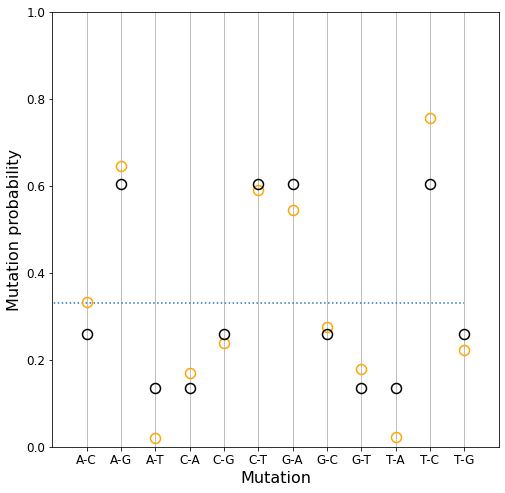

In [58]:
plt.figure('Mutation probability', figsize=(8,8))

for (x,y) in zip(['FFD_FIXED', 'MODEL'],['orange', 'black']):
    _tick_names = []
    _data = []
    for ind,base in enumerate(['A', 'C', 'G', 'T']):
        other_bases = ['A', 'C', 'G', 'T']
        other_bases.pop(ind)
        for other_base in other_bases:
            _tick_names.append('{}-{}'.format(base,other_base))
            _data.append(MUT_PROB[base][other_base][x])
    plt.plot(range(1,13),_data, 'o', mec=y, mfc='none', ms=10, mew=1.5, label=x)

plt.ylim(0,1)
plt.ylabel('Mutation probability', size=16)
plt.yticks(size=12)
plt.xticks(range(1,13), _tick_names, size=12)
plt.xlabel('Mutation', size=16)
plt.xlim(0,13)
plt.grid(axis='x')
plt.hlines(0.33,-1,12,linestyles='dotted')

In [59]:
FFD_base

{'A': {'C': 48, 'G': 93, 'T': 3},
 'C': {'A': 63, 'G': 88, 'T': 218},
 'G': {'A': 201, 'C': 102, 'T': 66},
 'T': {'A': 3, 'C': 105, 'G': 31},
 'TOTAL': 1021}

In [60]:
for (base,pi) in zip(['A', 'C', 'G', 'T'], [pi_a, pi_c, pi_g, pi_t]):
    given_base = np.sum(list(FFD_base[base].values()))/1021
    print('{0} FFD: {1:0.1f}%, GENOME: {2:0.1f}%, RATIO: {3:0.1f}'.format(base,
                                                                          given_base*100,
                                                                          pi*100,
                                                                          given_base/pi*100))

A FFD: 14.1%, GENOME: 17.2%, RATIO: 82.0
C FFD: 36.1%, GENOME: 32.9%, RATIO: 110.0
G FFD: 36.1%, GENOME: 32.7%, RATIO: 110.4
T FFD: 13.6%, GENOME: 17.2%, RATIO: 79.2


<font color=red size=4>So might be a bit biased.Let us the fixed SYN SNPs,not just FFD.</font>

In [61]:
ALLFIX_base = {'A': {'C':0, 'G':0, 'T':0},
            'C': {'A':0, 'G':0, 'T':0},
            'G': {'A':0, 'C':0, 'T':0},
            'T': {'A':0, 'C':0, 'G':0},
            'TOTAL': 0
           }


position = []
for line in open("all.fix_snp.annotated"):
    if line.startswith("locus"):
        continue
    pos = line.strip().split("\t")[0]
    line = line.strip().split("\t")
    if pos in position:
        continue
    else:
        position.append(pos)
    ref = line[1]
    snp = line[2]
    if ref == 'A':
        if snp == 'G':
            snp_type = 'Ti'
        elif snp == 'T':
            snp_type = 'Tv'
        else:
            snp_type = 'Tv'
    elif ref == 'C':
        if snp == 'G':
            snp_type = 'Tv'
        elif snp == 'T':
            snp_type = 'Ti'
        else:
            snp_type = 'Tv'
    elif ref == 'G':
        if snp == 'C':
            snp_type = 'Tv'
        elif snp == 'T':
            snp_type = 'Tv'
        else:
            snp_type = 'Ti'
    else:
        if snp == 'C':
            snp_type = 'Ti'
        elif ref == 'G':
            snp_type = 'Tv'
        else:
            snp_type = 'Tv'
    if line[8] == "Synonymous":
        for (W,M) in zip(ref, snp):
                    ALLFIX_base[W][M]+=1
                    ALLFIX_base['TOTAL']+=1
                    
ALLFIX_base
        
        
        
 

{'A': {'C': 45, 'G': 146, 'T': 7},
 'C': {'A': 71, 'G': 89, 'T': 355},
 'G': {'A': 382, 'C': 101, 'T': 76},
 'T': {'A': 0, 'C': 155, 'G': 43},
 'TOTAL': 1470}

In [62]:
for base in ['A','C','G','T']:    
    c_s = np.sum(list(ALLFIX_base[base].values()))
    for x in ALLFIX_base[base]:
        print(base, '->', x, int(ALLFIX_base[base][x])/c_s)
        MUT_PROB[base][x]['ALL_FIXED'] = int(ALLFIX_base[base][x])/c_s

A -> C 0.22727272727272727
A -> G 0.7373737373737373
A -> T 0.03535353535353535
C -> A 0.1378640776699029
C -> G 0.17281553398058253
C -> T 0.6893203883495146
G -> A 0.6833631484794276
G -> C 0.1806797853309481
G -> T 0.13595706618962433
T -> A 0.0
T -> C 0.7828282828282829
T -> G 0.21717171717171718


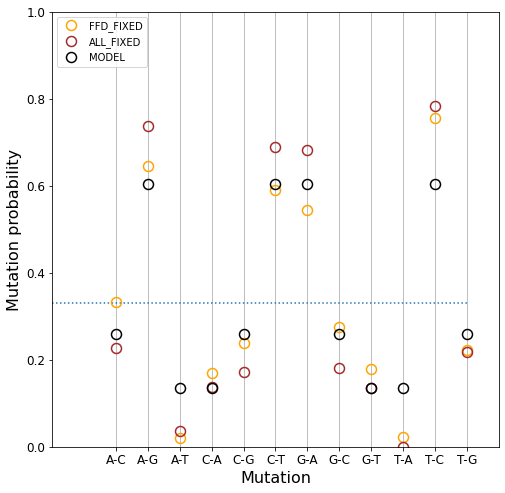

In [63]:
plt.figure('Mutation probability', figsize=(8,8))

for (x,y) in zip(['FFD_FIXED', 'ALL_FIXED', 'MODEL'],['orange', 'brown', 'black']):
    _tick_names = []
    _data = []
    for ind,base in enumerate(['A', 'C', 'G', 'T']):
        other_bases = ['A', 'C', 'G', 'T']
        other_bases.pop(ind)
        for other_base in other_bases:
            _tick_names.append('{}-{}'.format(base,other_base))
            _data.append(MUT_PROB[base][other_base][x])
    plt.plot(range(1,13),_data, 'o', mec=y, mfc='none', ms=10, mew=1.5, label=x)

plt.ylim(0,1)
plt.ylabel('Mutation probability', size=16)
plt.yticks(size=12)
plt.xticks(range(1,13), _tick_names, size=12)
plt.xlabel('Mutation', size=16)
plt.xlim(-1,13)
plt.legend(loc=2)
plt.grid(axis='x')
plt.hlines(0.33,-1,12,linestyles='dotted')

In [64]:
MUT_PROB['T']['C']

{'FFD_FIXED': 0.7553956834532374,
 'MODEL': 0.604309500489716,
 'ALL_FIXED': 0.7828282828282829}

In [65]:
FFD_base

{'A': {'C': 48, 'G': 93, 'T': 3},
 'C': {'A': 63, 'G': 88, 'T': 218},
 'G': {'A': 201, 'C': 102, 'T': 66},
 'T': {'A': 3, 'C': 105, 'G': 31},
 'TOTAL': 1021}

In [66]:
MUT_PROB = {'A': {'C': {}, 'G': {}, 'T': {}},
            'C': {'A': {}, 'G': {}, 'T': {}},
            'G': {'A': {}, 'C': {}, 'T': {}},
            'T': {'A': {}, 'C': {}, 'G': {}}
           }

for base in ['A','C','G','T']:    
    c_s = np.sum(list(FFD_base[base].values()))
    for x in FFD_base[base]:
        print(base, '->', x, int(FFD_base[base][x])/c_s)
        MUT_PROB[base][x]['FFD_FIXED'] = int(FFD_base[base][x])/c_s

A -> C 0.3333333333333333
A -> G 0.6458333333333334
A -> T 0.020833333333333332
C -> A 0.17073170731707318
C -> G 0.23848238482384823
C -> T 0.5907859078590786
G -> A 0.5447154471544715
G -> C 0.2764227642276423
G -> T 0.17886178861788618
T -> A 0.02158273381294964
T -> C 0.7553956834532374
T -> G 0.22302158273381295


In [67]:
ti = FFD_dict['Ti']/FFD_dict['TOTAL']
tv = FFD_dict['Tv']/FFD_dict['TOTAL']

print('Transition: {0:0.1f}%, Transversion: {1:0.1f}%'.format(ti*100,tv*100))

Transition: 60.4%, Transversion: 39.6%


In [68]:
#C to A:
print('T->C: {0:0.3f}'.format(ti))
print('T->G: {0:0.3f}'.format(pi_g/(pi_a+pi_g)*tv))
print('T->A: {0:0.3f}'.format(pi_a/(pi_a+pi_g)*tv))

T->C: 0.604
T->G: 0.259
T->A: 0.136


In [69]:
MUT_PROB

{'A': {'C': {'FFD_FIXED': 0.3333333333333333},
  'G': {'FFD_FIXED': 0.6458333333333334},
  'T': {'FFD_FIXED': 0.020833333333333332}},
 'C': {'A': {'FFD_FIXED': 0.17073170731707318},
  'G': {'FFD_FIXED': 0.23848238482384823},
  'T': {'FFD_FIXED': 0.5907859078590786}},
 'G': {'A': {'FFD_FIXED': 0.5447154471544715},
  'C': {'FFD_FIXED': 0.2764227642276423},
  'T': {'FFD_FIXED': 0.17886178861788618}},
 'T': {'A': {'FFD_FIXED': 0.02158273381294964},
  'C': {'FFD_FIXED': 0.7553956834532374},
  'G': {'FFD_FIXED': 0.22302158273381295}}}

In [70]:
MUTATION_POOL = {'A': '',
                 'C': '',
                 'G': '',
                 'T': ''
                }

for k in MUTATION_POOL.keys():
    for k1,v1 in MUT_PROB[k].items():
        MUTATION_POOL[k]+=(k1*int(v1['FFD_FIXED']*1000))
        
MUTATION_POOL

{'A': 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGTTTTTTTTTTTTTTT

In [71]:
for k,j in MUTATION_POOL.items():
    print (k,len(MUTATION_POOL[k]))   
#len(MUTATION_POOL['A'])

A 998
C 998
G 998
T 999


In [73]:
import random
CODON_TABLE = {'AAA': 'K', 'AAC': 'N', 'AAG': 'K', 'AAT': 'N', 'ACA': 'T',
               'ACC': 'T', 'ACG': 'T', 'ACT': 'T', 'AGA': 'R', 'AGC': 'S', 'AGG': 'R',
               'AGT': 'S', 'ATA': 'I', 'ATC': 'I', 'ATG': 'M', 'ATT': 'I', 'CAA': 'Q',
               'CAC': 'H', 'CAG': 'Q', 'CAT': 'H', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P',
               'CCT': 'P', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R', 'CTA': 'L',
               'CTC': 'L', 'CTG': 'L', 'CTT': 'L', 'GAA': 'E', 'GAC': 'D', 'GAG': 'E',
               'GAT': 'D', 'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A', 'GGA': 'G',
               'GGC': 'G', 'GGG': 'G', 'GGT': 'G', 'GTA': 'V', 'GTC': 'V', 'GTG': 'V',
               'GTT': 'V', 'TAA': 'STOP', 'TAC': 'Y', 'TAG': 'STOP', 'TAT': 'Y',
               'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S', 'TGA': 'STOP', 'TGC': 'C',
               'TGG': 'W', 'TGT': 'C', 'TTA': 'L', 'TTC': 'F', 'TTG': 'L', 'TTT': 'F'}

def mutate_codon(codon, mutation_pool):
    """Randomly mutate a base within a codon using
    a predefined substitution matrix. Score the 
    translational impact of mutaitons.
    
    INPUT:
    ------
    codon: str, NNN where N in ['A', 'C', 'G', 'T']
    mutation_pool: dict, key: base, value: str
    
    OUTPUT:
    ------
    int, 0|1, 0 for synonymous mutation, 1 for nonsynonymous
    
    NOTES:
    ------
    uses the standard random library
    """
    
    pos = random.randint(0,2)
    random_base = random.choice(mutation_pool[codon[pos]])
    
    cl = list(codon)
    cl[pos] = random_base
    new_codon = ''.join(cl)

    CODON_TABLE = {'AAA': 'K', 'AAC': 'N', 'AAG': 'K', 'AAT': 'N', 'ACA': 'T',
               'ACC': 'T', 'ACG': 'T', 'ACT': 'T', 'AGA': 'R', 'AGC': 'S', 'AGG': 'R',
               'AGT': 'S', 'ATA': 'I', 'ATC': 'I', 'ATG': 'M', 'ATT': 'I', 'CAA': 'Q',
               'CAC': 'H', 'CAG': 'Q', 'CAT': 'H', 'CCA': 'P', 'CCC': 'P', 'CCG': 'P',
               'CCT': 'P', 'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R', 'CTA': 'L',
               'CTC': 'L', 'CTG': 'L', 'CTT': 'L', 'GAA': 'E', 'GAC': 'D', 'GAG': 'E',
               'GAT': 'D', 'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A', 'GGA': 'G',
               'GGC': 'G', 'GGG': 'G', 'GGT': 'G', 'GTA': 'V', 'GTC': 'V', 'GTG': 'V',
               'GTT': 'V', 'TAA': 'STOP', 'TAC': 'Y', 'TAG': 'STOP', 'TAT': 'Y',
               'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S', 'TGA': 'STOP', 'TGC': 'C',
               'TGG': 'W', 'TGT': 'C', 'TTA': 'L', 'TTC': 'F', 'TTG': 'L', 'TTT': 'F'}
    
    return int(CODON_TABLE[codon]!=CODON_TABLE[new_codon])  


NSY_EXPECTATION = {
    codon: np.mean([np.mean([mutate_codon(codon, MUTATION_POOL)\
                             for x in range(1000)]) for y in range(100)])
    for codon in CODON_TABLE.keys()
}

NSY_EXPECTATION

{'AAA': 0.78485,
 'AAC': 0.8035100000000002,
 'AAG': 0.81899,
 'AAT': 0.74685,
 'ACA': 0.66798,
 'ACC': 0.66751,
 'ACG': 0.6665200000000001,
 'ACT': 0.6655400000000004,
 'AGA': 0.6759299999999999,
 'AGC': 0.80377,
 'AGG': 0.70815,
 'AGT': 0.74777,
 'ATA': 0.8828699999999999,
 'ATC': 0.7491099999999998,
 'ATG': 1.0,
 'ATT': 0.7383699999999999,
 'CAA': 0.78384,
 'CAC': 0.8040700000000001,
 'CAG': 0.8179799999999999,
 'CAT': 0.74887,
 'CCA': 0.66865,
 'CCC': 0.66807,
 'CCG': 0.6688300000000001,
 'CCT': 0.6663200000000002,
 'CGA': 0.6105200000000001,
 'CGC': 0.6677900000000001,
 'CGG': 0.6099200000000001,
 'CGT': 0.6638200000000001,
 'CTA': 0.46864000000000006,
 'CTC': 0.66496,
 'CTG': 0.47128,
 'CTT': 0.66594,
 'GAA': 0.7850400000000001,
 'GAC': 0.8026600000000002,
 'GAG': 0.8178800000000002,
 'GAT': 0.74776,
 'GCA': 0.6647600000000001,
 'GCC': 0.6655500000000002,
 'GCG': 0.66751,
 'GCT': 0.6670099999999999,
 'GGA': 0.66533,
 'GGC': 0.6678800000000001,
 'GGG': 0.6712700000000001,
 'GGT': 

In [74]:
import pandas as pd
all_snp_filtered6 = pd.read_csv("all_snp_final.csv")
#all_snp_filtered6 = all_snp_filtered2
all_snp_filtered6['CODING'] = [int(x in ['Nonsynonymous', 'Synonymous']) for x in all_snp_filtered6.anocid_type]

pNS_VAR = {}

click = 0
for patient in np.unique(all_snp_filtered6.patient_id):
    for x in list(set(all_snp_filtered6.stage[all_snp_filtered6.patient_id==patient])):
            #count observed data
            oN = Counter(all_snp_filtered6.anocid_type[(all_snp_filtered6.patient_id==patient)&(all_snp_filtered6.stage==x)])['Nonsynonymous']
            oS = Counter(all_snp_filtered6.anocid_type[(all_snp_filtered6.patient_id==patient)&(all_snp_filtered6.stage==x)])['Synonymous']
            #use mutation matrix to derive the expectation
            eN = np.sum([NSY_EXPECTATION[y] for y in all_snp_filtered6.condon_change.str.split('-',1).str[0][
                        (all_snp_filtered6.patient_id==patient)&(all_snp_filtered6.stage==x)&
                        (all_snp_filtered6.CODING==1)]])
            eS = (oN+oS)-eN
            #calculate pNS
            try:
                pNS = (oN/eN)/(oS/eS)
            
            except:
                pNS = np.nan
            
            #Remove all calculations where there were no observed mutations 
            #in either category 
            if pNS==0:
                pNS = np.nan
            if pNS==np.inf:
                pNS = np.nan
                
            #use binomial random sampling to derive a null distribution of pNS
            bN = np.sum([ss.binom(p=NSY_EXPECTATION[x],n=1).rvs(random_state=seed) for (seed,x) in enumerate(
                        all_snp_filtered6.condon_change.str.split('-',1).str[0][(all_snp_filtered6.patient_id==patient)&(all_snp_filtered6.stage==x)&(all_snp_filtered6.CODING==1)])])
            bS = (oN+oS)-bN
            try:
                pNS_b = (bN/eN)/(bS/eS)
            
            except:
                pNS_b = np.nan
            
            #Remove all calculations where there were no observed mutations 
            #in either category    
            if pNS_b==0:
                pNS_b = np.nan
            if pNS_b==np.inf:
                pNS_b = np.nan
                
            

            pNS_VAR[click] = {'PATIENT_ID': int(patient),
                              'TIME': int(x),
                              'pNS': pNS, 
                              'OBSERVED_SYN': oS,
                              'OBSERVED_NSY': oN,
                              'EXPECTED_SYN': eS,
                              'EXPECTED_NSY': eN,
                              'NEUTRAL_SYN': bS,
                              'NEUTRAL_NSY': bN,
                              'pNS_NEUTRAL': pNS_b,
                              'TOTAL': oS+oN
                             }
            click+=1
            
#ALL.drop('CODING', axis=1, inplace=True)

In [75]:
import pandas as pd
pNS_df = pd.DataFrame(pNS_VAR).T
pNS_df['S_R'] = [int(x in [41, 42, 43, 44,45,46,47,48,49,50]) for x in list(pNS_df.PATIENT_ID)]


In [76]:
pNS_df

,PATIENT_ID,TIME,pNS,OBSERVED_SYN,OBSERVED_NSY,EXPECTED_SYN,EXPECTED_NSY,NEUTRAL_SYN,NEUTRAL_NSY,pNS_NEUTRAL,TOTAL,S_R
0,1.0,0.0,0.647666,3.0,5.0,2.23880,5.76120,2.0,6.0,1.165799,8.0,0
1,1.0,7.0,0.833420,3.0,7.0,2.63178,7.36822,3.0,7.0,0.833420,10.0,0
2,1.0,8.0,0.555111,3.0,4.0,2.05766,4.94234,2.0,5.0,1.040833,7.0,0
3,1.0,47.0,0.519310,4.0,5.0,2.64159,6.35841,3.0,6.0,0.830896,9.0,0
4,1.0,49.0,0.420699,5.0,5.0,2.96121,7.03879,3.0,7.0,0.981630,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,50.0,0.0,0.440098,5.0,5.0,3.05603,6.94397,3.0,7.0,1.026896,10.0,1
119,50.0,2.0,0.709876,3.0,5.0,2.38961,5.61039,2.0,6.0,1.277777,8.0,1
120,51.0,0.0,0.587278,6.0,8.0,4.28087,9.71913,5.0,9.0,0.792825,14.0,0
121,51.0,1.0,2.000326,2.0,10.0,3.42897,8.57103,4.0,8.0,0.800130,12.0,0


In [77]:
len(_E[0])

100

In [78]:
len(_E[1])

100

In [79]:
pNS_df['pNS'][pNS_df['pNS']<0]

Series([], Name: pNS, dtype: float64)

MannwhitneyuResult(statistic=243.0, pvalue=0.6444842703753659)
MannwhitneyuResult(statistic=2322.5, pvalue=6.111138546887032e-11)
MannwhitneyuResult(statistic=722.0, pvalue=0.005553981920621333)
MannwhitneyuResult(statistic=4153.5, pvalue=9.861820354051287e-10)


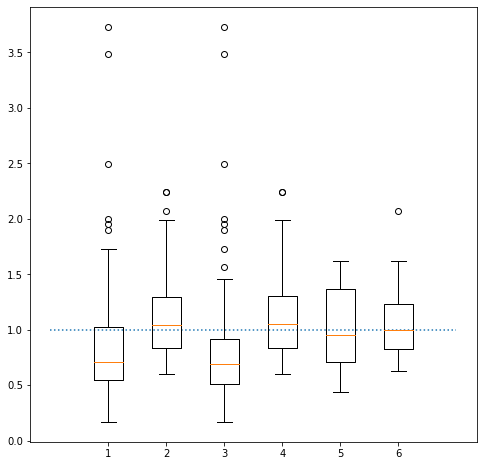

In [80]:
pNS_df = pd.DataFrame(pNS_VAR).T
pNS_df['S_R'] = [int(x in [41, 42, 43, 44,45,46,47,48,49,50]) for x in list(pNS_df.PATIENT_ID)]
from scipy import stats as ss
import matplotlib.pyplot as plt

plt.figure('pNS boxplots', figsize=(8,8))
_NE = [list(pNS_df[x][
            (pNS_df[x]>0)&(pNS_df.S_R==1)]) for x in ['pNS', 'pNS_NEUTRAL']]
_E = [list(pNS_df[x][
            (pNS_df[x]>0)&(pNS_df.S_R==0)]) for x in ['pNS', 'pNS_NEUTRAL']]

_F = [list(pNS_df[x][
            (pNS_df[x]>0)]) for x in ['pNS', 'pNS_NEUTRAL']]

plt.hlines(1,0,7,linestyles='dotted')
plt.boxplot(_F+_E+_NE)
#plt.boxplot(_E[0],_NE[0])
#plt.boxplot(_E+_NE)
print(ss.mannwhitneyu(_NE[0],_NE[1]))
print(ss.mannwhitneyu(_E[0],_E[1]))
print(ss.mannwhitneyu(_E[0],_NE[0]))
print(ss.mannwhitneyu(_F[0],_F[1]))

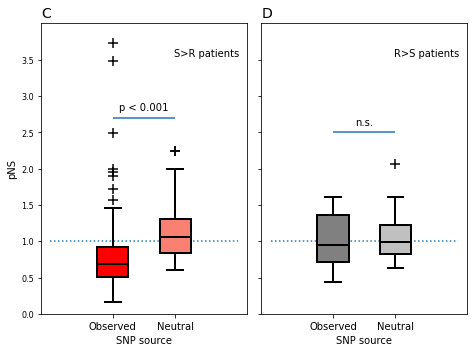

In [105]:
double_column_figure_r = (6.69,5)
tick_size = 8
label_size = 10
title_size = 10
text_size = 8
single_column_figure = (3.35,3.35)
double_column_figure_s = (6.69,6.69)

plt.figure('pNS_composite2', figsize=double_column_figure_r)

plt.subplot2grid((5,10), (0,0), rowspan=5, colspan=5) 
plt.hlines(1,0,3, linestyles='dotted')
bp2 = plt.boxplot([list(pNS_df.pNS[(pNS_df.S_R==0)&
                                   (pNS_df.pNS>0)]), 
                   list(pNS_df.pNS_NEUTRAL[(pNS_df.S_R==0)&
                                           (pNS_df.pNS_NEUTRAL>0)])
                  ],
                  patch_artist=True, widths=.5)

for box in bp2['boxes']:
    box.set(color='black',lw=2)

for whisker in bp2['whiskers']:
    whisker.set(color='black', linestyle='solid',lw=2)

for median in bp2['medians']:
    median.set(color='black', lw=2)
    
for cap in bp2['caps']:
    cap.set(color='black',lw=2)
    
for flier in bp2['fliers']:
    flier.set(marker='+', color='black', mew=1.5, mfc='white', ms=10)
    
fc = ['red','salmon', 'red', 'salmon']    
for ind in range(2):
    bp2['boxes'][ind].set(facecolor = fc[ind])
    

plt.xticks([1,2],['Observed','Neutral'],size=label_size,rotation=0)
plt.ylim(0,4)
plt.yticks(np.arange(0,4,.5), np.arange(0,4,.5), size=tick_size)
#plt.title('Efficacious\ntreatment', size=16)
plt.title('C', size=14, loc='left')
plt.xlabel('SNP source', size=label_size)

plt.hlines(2.7,1,2, linestyles='solid')
plt.text(1.5,2.8, 'p < 0.001', size=label_size, horizontalalignment='center')
plt.text(2.5,3.55, 'S>R patients', size=label_size, horizontalalignment='center')
plt.ylabel('pNS', size=label_size)


plt.subplot2grid((5,10), (0,5), rowspan=5, colspan=5)

plt.hlines(1,0,3, linestyles='dotted')
bp3 = plt.boxplot([list(pNS_df.pNS[(pNS_df.S_R==1)&
                                   (pNS_df.pNS>0)]), 
                   list(pNS_df.pNS_NEUTRAL[(pNS_df.S_R==1)&
                                           (pNS_df.pNS_NEUTRAL>0)])
                   ],
                  patch_artist=True, widths=.5)

for box in bp3['boxes']:
    box.set(color='black',lw=2)

for whisker in bp3['whiskers']:
    whisker.set(color='black', linestyle='solid',lw=2)

for median in bp3['medians']:
    median.set(color='black', lw=2)
    
for cap in bp3['caps']:
    cap.set(color='black',lw=2)
    
for flier in bp3['fliers']:
    flier.set(marker='+', color='black', mew=1.5, mfc='white', ms=10)
    
fc = ['grey','silver','grey', 'silver']
for ind in range(2):
    bp3['boxes'][ind].set(facecolor = fc[ind])
    

plt.xticks([1,2],['Observed','Neutral'],size=label_size,rotation=0)
plt.ylim(0,4)
plt.yticks(np.arange(0,4,.5), [], size=tick_size)
#plt.title('Non-efficacious\ntreatment', size=16)
plt.title('D', size=14, loc='left')
plt.xlabel('SNP source', size=label_size)

plt.hlines(2.5,1,2, linestyles='solid')
#plt.text(1.5,3.35, 'p = 0.42', size=16,horizontalalignment='center')
plt.text(1.5,2.6, 'n.s.', size=label_size ,horizontalalignment='center')
plt.text(2.5,3.55, 'R>S patients', size=label_size, horizontalalignment='center')

#plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

plt.savefig('/home2/sunxh/jupyter/vsnp_pNS.pdf')

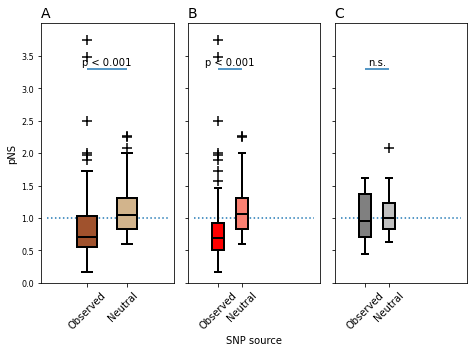

In [50]:
double_column_figure_r = (6.69,5)
tick_size = 8
label_size = 10
title_size = 10
text_size = 8
single_column_figure = (3.35,3.35)
double_column_figure_s = (6.69,6.69)

plt.figure('pNS_composite2', figsize=double_column_figure_r)

plt.subplot2grid((5,15), (0,0), rowspan=5, colspan=5) 
#makes a split figure - 5x15 quadrants. The first figure 
#starts in the first column of the 1st row and spans 5 rows and 5 columns.

#PLOT pNS for all_SNPs
plt.hlines(1,0,3, linestyles='dotted')
bp1 = plt.boxplot([list(pNS_df.pNS[(pNS_df.pNS>0)]), 
                   list(pNS_df.pNS_NEUTRAL[(pNS_df.pNS_NEUTRAL>0)])], 
                  patch_artist=True, widths=.5)

#MODIFY THE PARAMETERS OF THE BOX PLOT
for box in bp1['boxes']:
    box.set(color='black',lw=2)

for whisker in bp1['whiskers']:
    whisker.set(color='black', linestyle='solid',lw=2)

for median in bp1['medians']:
    median.set(color='black', lw=2)
    
for cap in bp1['caps']:
    cap.set(color='black',lw=2)
    
for flier in bp1['fliers']:
    flier.set(marker='+', color='black', mew=1.5, mfc='white', ms=10)
    
fc = ['sienna', 'tan']
for ind in range(2):
    bp1['boxes'][ind].set(facecolor = fc[ind])
    
plt.ylabel('pNS', size=label_size)
plt.yticks(np.arange(0,4,.5),size=tick_size)
plt.xticks([1,2],['Observed','Neutral\n'],size=label_size,rotation=45)
plt.ylim(0,4)
#plt.title('All\npatients', size=16)
plt.title('A', size=14, loc='left')
plt.hlines(3.3,1,2, linestyles='solid')
plt.text(1.5,3.35,'p < 0.001', size=label_size,horizontalalignment='center')


plt.subplot2grid((5,15), (0,5), rowspan=5, colspan=5)

plt.hlines(1,0,5, linestyles='dotted')
bp2 = plt.boxplot([list(pNS_df.pNS[(pNS_df.S_R==0)&
                                   (pNS_df.pNS>0)]), 
                   list(pNS_df.pNS_NEUTRAL[(pNS_df.S_R==0)&
                                           (pNS_df.pNS_NEUTRAL>0)])
                  ],
                  patch_artist=True, widths=.5)

for box in bp2['boxes']:
    box.set(color='black',lw=2)

for whisker in bp2['whiskers']:
    whisker.set(color='black', linestyle='solid',lw=2)

for median in bp2['medians']:
    median.set(color='black', lw=2)
    
for cap in bp2['caps']:
    cap.set(color='black',lw=2)
    
for flier in bp2['fliers']:
    flier.set(marker='+', color='black', mew=1.5, mfc='white', ms=10)
    
fc = ['red','salmon', 'red', 'salmon']    
for ind in range(2):
    bp2['boxes'][ind].set(facecolor = fc[ind])
    

plt.xticks([1,2],['Observed','Neutral'],size=label_size,rotation=45)
plt.ylim(0,4)
plt.yticks(np.arange(0,4,.5), [], size=tick_size)
#plt.title('Efficacious\ntreatment', size=16)
plt.title('B', size=14, loc='left')
plt.xlabel('SNP source', size=label_size)

plt.hlines(3.3,1,2, linestyles='solid')
plt.text(1.5,3.35, 'p < 0.001', size=label_size, horizontalalignment='center')


plt.subplot2grid((5,15), (0,10), rowspan=5, colspan=5)

plt.hlines(1,0,5, linestyles='dotted')
bp3 = plt.boxplot([list(pNS_df.pNS[(pNS_df.S_R==1)&
                                   (pNS_df.pNS>0)]), 
                   list(pNS_df.pNS_NEUTRAL[(pNS_df.S_R==1)&
                                           (pNS_df.pNS_NEUTRAL>0)])
                   ],
                  patch_artist=True, widths=.5)

for box in bp3['boxes']:
    box.set(color='black',lw=2)

for whisker in bp3['whiskers']:
    whisker.set(color='black', linestyle='solid',lw=2)

for median in bp3['medians']:
    median.set(color='black', lw=2)
    
for cap in bp3['caps']:
    cap.set(color='black',lw=2)
    
for flier in bp3['fliers']:
    flier.set(marker='+', color='black', mew=1.5, mfc='white', ms=10)
    
fc = ['grey','silver','grey', 'silver']
for ind in range(2):
    bp3['boxes'][ind].set(facecolor = fc[ind])
    

plt.xticks([1,2],['Observed','Neutral'],size=label_size,rotation=45)
plt.ylim(0,4)
plt.yticks(np.arange(0,4,.5), [], size=tick_size)
#plt.title('Non-efficacious\ntreatment', size=16)
plt.title('C', size=14, loc='left')

plt.hlines(3.3,1,2, linestyles='solid')
#plt.text(1.5,3.35, 'p = 0.42', size=16,horizontalalignment='center')
plt.text(1.5,3.35, 'n.s.', size=label_size ,horizontalalignment='center')

#plt.subplots_adjust(bottom=0.2)
plt.tight_layout()

#plt.savefig('../reports/figures/5_pNS.pdf')
#plt.savefig('../reports/figures/5_pNS.png',dpi=300)


In [142]:
pNS_df = pd.read_csv('/Parastor300s_G30S/sunxh/software2/TBRU_serialTB/data/interim/5_pNS_patients.csv', index_col=0)

In [146]:
len(pNS_df[pNS_df.NON_EFFICACIOUS==1])

22

In [76]:
all_snp_filtered6

,Unnamed: 0,locus,ref_base,alt_base,frequency,coverage,patient_id,stage,codon_number,anocid_type,...,gene_type,Unnamed: 0.1,mean_depth,std_depth,max_depth_cutoff,min_depth_cutoff,mix_infor,ref_reads,alt_reads,CODING
0,0,908186,T,C,0.987879,165,10,0,100,Nonsynonymous,...,protein_coding,0,227.583294,54.469411,272.840887,137.068110,No,1.999965,163.000035,1
1,1,775655,A,T,0.068627,204,10,0,942,Synonymous,...,protein_coding,0,227.583294,54.469411,272.840887,137.068110,No,14.000010,189.999990,1
2,2,1094375,C,G,0.314159,226,10,0,-,---,...,protein_coding##protein_coding,0,227.583294,54.469411,272.840887,137.068110,No,70.999934,155.000066,0
3,3,1443428,G,A,0.409594,271,10,0,-,---,...,protein_coding##protein_coding,0,227.583294,54.469411,272.840887,137.068110,No,110.999974,160.000026,0
4,4,2030848,A,G,0.114583,192,10,0,52,Nonsynonymous,...,protein_coding,0,227.583294,54.469411,272.840887,137.068110,No,21.999936,170.000064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,2191,2945004,C,G,0.185950,242,8,9,-,---,...,protein_coding##protein_coding,148,268.437795,77.746475,317.590009,170.133367,No,44.999900,197.000100,0
2192,2192,2945101,A,G,0.115538,251,8,9,-,---,...,protein_coding##protein_coding,148,268.437795,77.746475,317.590009,170.133367,No,29.000038,221.999962,0
2193,2193,3232703,G,A,0.495968,248,8,9,-,---,...,protein_coding##protein_coding,148,268.437795,77.746475,317.590009,170.133367,No,123.000064,124.999936,0
2194,2194,3232759,G,A,0.940559,286,8,9,-,---,...,protein_coding##protein_coding,148,268.437795,77.746475,317.590009,170.133367,No,17.000126,268.999874,0


In [178]:
patient_infor = pd.read_excel("/Parastor300s_G30S/sunxh/MTB/v_snp2/population_infor.xlsx", skiprows = 10)
patient_infor.Case = patient_infor.Case.astype(int)
pNS_df2 = pd.merge(pNS_df,patient_infor,left_on=['PATIENT_ID'],right_on=['Case'], how='left')
isolate_infor = pd.read_excel("/Parastor300s_G30S/sunxh/MTB/v_snp2/isolate_infor.xlsx")
pNS_df3 = pd.merge(pNS_df2,isolate_infor,left_on=['PATIENT_ID','TIME'],right_on=['Case','Isolate'], how='left')


In [ ]:
_NE = [list(pNS_df[x][
            (pNS_df[x]>0)&(pNS_df.S_R==1)]) for x in ['pNS', 'pNS_NEUTRAL']]
_E = [list(pNS_df[x][
            (pNS_df[x]>0)&(pNS_df.S_R==0)]) for x in ['pNS', 'pNS_NEUTRAL']]

_F = [list(pNS_df[x][
            (pNS_df[x]>0)]) for x in ['pNS', 'pNS_NEUTRAL']]

plt.hlines(1,0,7,linestyles='dotted')
#plt.boxplot(_F+_E+_NE)
plt.boxplot(_E+_NE)
print(ss.mannwhitneyu(_NE[0],_NE[1]))
print(ss.mannwhitneyu(_E[0],_E[1]))
print(ss.mannwhitneyu(_E[0],_NE[0]))
print(ss.mannwhitneyu(_F[0],_F[1]))

In [179]:
pNS_df3

,PATIENT_ID,TIME,pNS,OBSERVED_SYN,OBSERVED_NSY,EXPECTED_SYN,EXPECTED_NSY,NEUTRAL_SYN,NEUTRAL_NSY,pNS_NEUTRAL,...,Sampling_date,Isolate,Streptomycin,Isoniazid,Rifampicin,Ethambutol,Ofloxacin,Kanamycin,line_Isoniazid,line_Rifampicin
0,1.0,0.0,0.646975,3.0,5.0,2.23708,5.76292,2.0,6.0,1.164555,...,2009-10-13,0,S,S,S,S,S,S,S,S
1,1.0,7.0,0.831985,3.0,7.0,2.62844,7.37156,3.0,7.0,0.831985,...,2010-04-28,7,S,S,S,S,S,S,S,S
2,1.0,8.0,0.555845,3.0,4.0,2.05958,4.94042,2.0,5.0,1.042209,...,2010-05-26,8,S,R,S,S,S,S,S,S
3,1.0,47.0,0.520466,4.0,5.0,2.64574,6.35426,3.0,6.0,0.832745,...,2013-08-25,47,S,S,R,S,S,S,S,R
4,1.0,49.0,0.421692,5.0,5.0,2.96613,7.03387,3.0,7.0,0.983949,...,2013-10-31,49,S,R,R,S,S,S,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,50.0,0.0,0.439601,5.0,5.0,3.05363,6.94637,3.0,7.0,1.025735,...,2010-05-10,0,S,R,S,S,NaN,NaN,R,S
119,50.0,2.0,0.711407,3.0,5.0,2.39322,5.60678,2.0,6.0,1.280532,...,2010-06-28,2,S,S,S,R,NaN,NaN,R,F
120,51.0,0.0,0.588227,6.0,8.0,4.28567,9.71433,5.0,9.0,0.794106,...,2016-06-18,0,R,R,S,S,S,S,R,R
121,51.0,1.0,2.011107,2.0,10.0,3.44215,8.55785,4.0,8.0,0.804443,...,2016-07-22,1,R,R,R,R,S,S,R,F


In [172]:
patient_infor

,phenotypic_INH_RIF_DR,Case,Sex,Age,Onset_of_TB_symptoms,Symptoms_at_baseline,Chest X-ray_Left_lung,Chest X-ray_right_lung,Cavitation_left_lung,Cavitation_right_lung,Smear_grading_at_baseline,Concomitance_of_extra_pulmonary_TB,Diabetes_comorbidity,Previous_treatment,Date_of_treatment_onset,Anti_TB_treatment,Anti_TB_interruption
0,1,1,Male,57,2009-08-07,Cough,"Upper, middle","Upper, middle, low",Upper,No,3+,Pleurisy,No,Previously treated,2010-04-28,≥60,≥30
1,1,2,Male,27,2009-06-25,"Cough, chest pain, Fever",No,Upper,No,Upper,1+,No,No,New patient,2009-08-29,≥60,≥30
2,1,3,Male,47,2009-08-15,"Cough, chest pain",No,"Upper, middle",No,"Upper, middle",3+,No,Yes,New patient,2009-10-23,≥60,≥30
3,1,4,Male,55,2009-11-01,"Cough, blood sputum or hemoptysis, Fever",No,"Upper, middle, low",No,Upper,2+,No,Yes,Previously treated,2010-01-08,≥60,≥30
4,1,5,Male,52,2010-01-01,"Cough, blood sputum or hemoptysis, Fever","Upper, middle, low","Upper, middle, low",Upper,Upper,1+,No,No,New patient,2010-03-24,≥60,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,3,46,Male,62,2015-02-27,"Cough, blood sputum or hemoptysis, other symptoms",No,Upper,No,Upper,2+,No,Yes,Previously treated,2015-03-05,≥60,<30
333,3,47,Male,41,2011-04-07,Cough,"Upper, middle",No,Middle,No,2+,No,No,New patient,2011-06-14,≥60,≥30
334,3,48,Female,51,2010-04-26,"Cough, blood sputum or hemoptysis, Fever",No,"Upper, middle",No,No,2+,No,Yes,New patient,2010-11-05,≥60,<30
335,3,49,Female,65,2012-10-22,Cough,"Upper, middle",No,Middle,No,4+,No,No,New patient,2013-04-25,<60,<30


In [169]:
pNS_df

,PATIENT_ID,TIME,pNS,OBSERVED_SYN,OBSERVED_NSY,EXPECTED_SYN,EXPECTED_NSY,NEUTRAL_SYN,NEUTRAL_NSY,pNS_NEUTRAL,TOTAL,S_R
0,1.0,0.0,0.646975,3.0,5.0,2.23708,5.76292,2.0,6.0,1.164555,8.0,0
1,1.0,7.0,0.831985,3.0,7.0,2.62844,7.37156,3.0,7.0,0.831985,10.0,0
2,1.0,8.0,0.555845,3.0,4.0,2.05958,4.94042,2.0,5.0,1.042209,7.0,0
3,1.0,47.0,0.520466,4.0,5.0,2.64574,6.35426,3.0,6.0,0.832745,9.0,0
4,1.0,49.0,0.421692,5.0,5.0,2.96613,7.03387,3.0,7.0,0.983949,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,50.0,0.0,0.439601,5.0,5.0,3.05363,6.94637,3.0,7.0,1.025735,10.0,1
119,50.0,2.0,0.711407,3.0,5.0,2.39322,5.60678,2.0,6.0,1.280532,8.0,1
120,51.0,0.0,0.588227,6.0,8.0,4.28567,9.71433,5.0,9.0,0.794106,14.0,0
121,51.0,1.0,2.011107,2.0,10.0,3.44215,8.55785,4.0,8.0,0.804443,12.0,0


In [173]:
isolate_infor 

,Category,Case,Sampling_date,Isolate,Streptomycin,Isoniazid,Rifampicin,Ethambutol,Ofloxacin,Kanamycin,line_Isoniazid,line_Rifampicin
0,1,1,2009-10-13,0,S,S,S,S,S,S,S,S
1,1,1,2010-04-28,7,S,S,S,S,S,S,S,S
2,1,1,2010-05-26,8,S,R,S,S,S,S,S,S
3,1,1,2013-08-25,47,S,S,R,S,S,S,S,R
4,1,1,2013-10-31,49,S,R,R,S,S,S,S,R
...,...,...,...,...,...,...,...,...,...,...,...,...
161,3,48,2011-01-11,3,S,S,S,S,S,S,R,R
162,3,49,2013-04-23,0,R,R,R,R,S,S,R,R
163,3,49,2013-05-24,1,S,S,S,S,S,S,S,S
164,3,50,2010-05-10,0,S,R,S,S,NaN,NaN,R,S
